In [1]:
!pip install peakutils


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
from peakutils import baseline

In [3]:
# import os
# import pandas as pd
# import numpy as np

# # Folder containing the spectroscopy files
# folder_path = "/media/ahaanbanerjee/Crucial X9/Capstone/dataset/"

# # Initialize an empty list to store all the dataframes
# dataframes = []
# all_wavenumbers = set()  # To store all unique wavenumbers
# files = ['BLANK','PE','PMMA','PS','PTFE','PVC']
# # Loop through all files in the folder
# for pls in files:
#     for file_name in os.listdir(folder_path+pls):
#         if file_name.endswith(".txt"):  
#             # Read each file into a DataFrame (space-separated values)
#             file_path = os.path.join(folder_path, pls+'/'+file_name)
#             data = pd.read_csv(file_path, sep = '\s+', header=None, names=["wavenumber", "intensity"])
            
#             # Truncate wavenumber values (round to nearest integer or truncate decimals)
#             data["wavenumber"] = data["wavenumber"].round().astype(int)  # Adjust as needed
            
#             # Update the set of all wavenumbers
#             all_wavenumbers.update(data["wavenumber"].unique())
            
#             # Add file name and type columns
#             data["file_name"] = file_name
#             data["type"] = pls
            
#             # Append the DataFrame to the list
#             dataframes.append(data)

# # Sort the unique wavenumbers
# all_wavenumbers = sorted(all_wavenumbers)

# # Create the final combined DataFrame
# final_data = pd.DataFrame(columns=["file_name", "type"] + all_wavenumbers)

# # Populate the final DataFrame
# for df in dataframes:
#     # Pivot the data so wavenumber becomes columns and intensity becomes the values
#     pivoted = df.pivot_table(index=["file_name", "type"], columns="wavenumber", values="intensity", aggfunc="first")
    
#     # Reindex to ensure all wavenumbers are included, filling missing values with NaN
#     pivoted = pivoted.reindex(columns=all_wavenumbers, fill_value=np.nan)
    
#     # Reset index and append to final DataFrame
#     pivoted.reset_index(inplace=True)
#     final_data = pd.concat([final_data, pivoted], ignore_index=True)

# # Save the combined DataFrame to a CSV file
# output_path = "combined_spectroscopy_nano_plastic.csv"
# final_data.to_csv(output_path, index=False)

# print(f"Combined data saved to {output_path}")


In [4]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # Replace 'your_data_file.txt' with the path to your text file
# data_file = '/media/ahaanbanerjee/Crucial X9/Capstone/Non _Baseline/sta-1.txt'
# data_file2 = '/media/ahaanbanerjee/Crucial X9/Capstone/Baseline_Corrected/sta-1.txt'
# # Read the data from the text file assuming it is space separated
# data1 = pd.read_csv(data_file, sep='\s+', header=None, names=['Raman Shift', 'Intensity'])
# data2 = pd.read_csv(data_file2, sep='\s+', header=None, names=['Raman Shift', 'Intensity'])
# # Plot the data
# plt.figure(figsize=(10,5))
# plt.plot(data1['Raman Shift'], data1['Intensity'], marker='', color='blue', linewidth=2)
# plt.plot(data2['Raman Shift'], data2['Intensity'], marker='', color='red', linewidth=2)
# plt.title('Raman Spectroscopy Data')
# plt.xlabel('Raman Shift (cm-1)')
# plt.ylabel('Intensity')
# plt.grid(True)
# plt.tight_layout()

# # Show the plot
# plt.show()


# AutoEncoder Training

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

all_input_data = []
cnt = 0
data = pd.read_csv("/media/ahaanbanerjee/Crucial X9/Capstone/Data/fullBinary_aug_baselineCorr.csv")

remove_classes = ["PS", "PC", "NC", "/", "ABS"]
#Filter out rows where 'Plastic' is in remove_classes
data = data[~data['Plastic'].isin(remove_classes)]

scaler = MinMaxScaler(feature_range=(0, 1))  # Normalize between 0 and 1
wave_numbers = data.columns[3:]
spectra = data.iloc[:, 3:].astype(float)

# Loop through all the files in the input folder
for col in range(len(spectra)):
    y = spectra.iloc[col].values.astype(float)
    temp = y.reshape(-1, 1)
    
    # Normalize between 0 and 1
    temp = scaler.fit_transform(temp)
    
    # Flatten to 1D and store
    temp = temp.reshape(1, -1)
    
    # Append to the list
    all_input_data.append(temp)
    cnt += 1


In [8]:
data.head()

,Filename,Plastic,class,200.0904693,202.9747514,205.8580216,208.7402807,211.6215296,214.501769,217.3809999,...,3478.533384,3480.437351,3482.340824,3484.243803,3486.146288,3488.048279,3489.949777,3491.850782,3493.751294,3495.651313
0,sta-1,PE,S,481.320059,456.004779,466.690553,448.377381,455.065262,463.754197,452.444185,...,222.087126,242.249061,210.412050,151.576093,188.741190,244.907340,225.074543,171.242801,188.412112,166.582477
1,sta-1,PE,S,480.323027,459.144006,465.806135,451.965435,453.224244,465.964228,453.113970,...,225.994536,235.223920,214.887030,149.215897,203.846432,260.299917,212.834458,186.280053,183.173238,178.159445
2,sta-1,PE,S,483.062214,461.269950,467.424315,445.979952,452.580405,467.572229,457.732677,...,239.204674,259.477788,227.491963,141.592199,197.435470,234.460851,214.729268,183.131163,182.824052,172.577740
3,sta-1,PE,S,479.616490,452.753328,463.973488,445.134221,454.169630,464.554485,453.358037,...,222.022200,251.411962,198.664733,140.124034,184.128513,240.662016,213.258294,166.104581,180.217319,179.859368
4,sta-1,PE,S,484.960405,454.415992,466.467296,451.892093,450.856426,464.397285,448.228246,...,222.294925,242.256284,213.171111,163.677922,174.868595,235.681321,211.009133,172.893660,193.773452,152.792827


In [9]:
X = np.array(all_input_data)
Y= np.array(all_input_data)

In [10]:
print(X.shape)
print(Y.shape)


(1440, 1, 1412)
(1440, 1, 1412)


In [11]:
from keras.layers import Input, Dense, BatchNormalization, Dropout, LeakyReLU
from keras.models import Model

# Define the input shape
input_shape = (1,1412)

# Encoder
input_layer = Input(shape=input_shape)
encoded = Dense(2048)(input_layer)
encoded = LeakyReLU(alpha=0.1)(encoded)
encoded = BatchNormalization()(encoded)

encoded = Dense(1024)(encoded)
encoded = LeakyReLU(alpha=0.1)(encoded)
encoded = BatchNormalization()(encoded)

encoded = Dense(512)(encoded)
encoded = LeakyReLU(alpha=0.1)(encoded)
encoded = BatchNormalization()(encoded)

encoded = Dense(256)(encoded)
encoded = LeakyReLU(alpha=0.1)(encoded)
encoded = BatchNormalization()(encoded)

encoded = Dense(128)(encoded)
encoded = LeakyReLU(alpha=0.1)(encoded)
encoded = BatchNormalization()(encoded)

# Latent Space (Feature Representation)
latent_space = Dense(64, activation='linear')(encoded)  # Increased latent space size

# Decoder
decoded = Dense(128)(latent_space)
decoded = LeakyReLU(alpha=0.1)(decoded)
decoded = BatchNormalization()(decoded)

decoded = Dense(256)(decoded)
decoded = LeakyReLU(alpha=0.1)(decoded)
decoded = BatchNormalization()(decoded)

decoded = Dense(512)(decoded)
decoded = LeakyReLU(alpha=0.1)(decoded)
decoded = BatchNormalization()(decoded)

decoded = Dense(1024)(decoded)
decoded = LeakyReLU(alpha=0.1)(decoded)
decoded = BatchNormalization()(decoded)

decoded = Dense(2048)(decoded)
decoded = LeakyReLU(alpha=0.1)(decoded)
decoded = BatchNormalization()(decoded)

# Output layer (Sigmoid for normalized data)
decoded = Dense(1412, activation='sigmoid')(decoded)  # Sigmoid ensures output is between 0-1

# Define Autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the Autoencoder
autoencoder.compile(optimizer='adam', loss='mae')  # Use MAE for better reconstruction

# Print model summary
autoencoder.summary()

# Define Encoder model (for extracting latent features)
encoder_model = Model(input_layer, latent_space)


2025-03-18 12:12:33.379944: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-18 12:12:33.499464: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742280153.542144   13059 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742280153.554289   13059 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-18 12:12:33.678785: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1, 1412)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1, 2048)        │     2,893,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 1, 2048)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1, 2048)        │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1, 1024)        │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 1, 1024)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1, 1024)        │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1, 512)         │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 1, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1, 512)         │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1, 256)         │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1, 128)         │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 1, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1, 64)          │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1, 128)         │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 1, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1, 256)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 1, 256)         │             

 Total params: 11,411,652 (43.53 MB)

 Trainable params: 11,395,780 (43.47 MB)

 Non-trainable params: 15,872 (62.00 KB)

In [12]:
encoder_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1, 1412)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1, 2048)        │     2,893,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 1, 2048)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1, 2048)        │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1, 1024)        │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 1, 1024)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1, 1024)        │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1, 512)         │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 1, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1, 512)         │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1, 256)         │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1, 128)         │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 1, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1, 64)          │         8,256 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,705,152 (21.76 MB)

 Trainable params: 5,697,216 (21.73 MB)

 Non-trainable params: 7,936 (31.00 KB)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,X,test_size=0.2,random_state=42,shuffle=True)

In [14]:
history=autoencoder.fit(X_train,X_train,validation_data=(X_test, X_test),batch_size=128,epochs=500)

Epoch 1/500


I0000 00:00:1742280197.338919   13937 service.cc:148] XLA service 0x7fa0e40143a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1742280197.339054   13937 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-03-18 12:13:17.423192: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1742280197.751585   13937 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-03-18 12:13:18.391765: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_6', 104 bytes spill stores, 104 bytes spill loads



7/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3248

I0000 00:00:1742280199.643701   13937 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2025-03-18 12:13:20.373599: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_6', 360 bytes spill stores, 360 bytes spill loads



9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - loss: 0.3099 - val_loss: 0.6717
Epoch 2/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1386 - val_loss: 0.7132
Epoch 3/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1065 - val_loss: 0.6261
Epoch 4/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0884 - val_loss: 0.5460
Epoch 5/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0893 - val_loss: 0.5329
Epoch 6/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0755 - val_loss: 0.5055
Epoch 7/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0744 - val_loss: 0.4812
Epoch 8/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0686 - val_loss: 0.4292
Epoch 9/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0669 - val_loss: 0.3837
Epoch 10/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0659 - val_loss: 0.3499
Epoch 11/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0640 - val_loss: 0.3761
Epoch 12/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0684 - val_loss: 0.2884


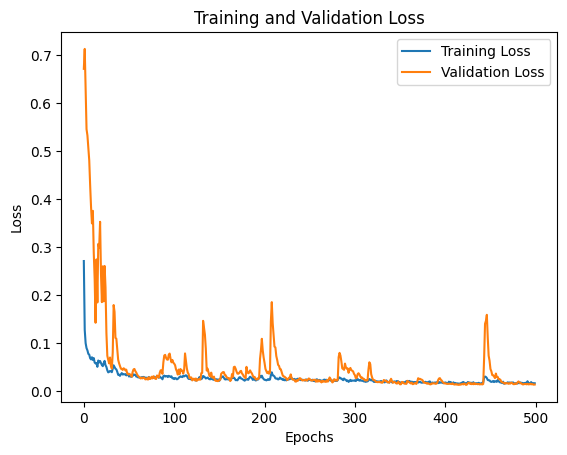

In [15]:
import matplotlib.pyplot as plt

# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')

# Check if validation loss is available and plot it
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [16]:
import keras
keras.saving.save_model(encoder_model,'/media/ahaanbanerjee/Crucial X9/Capstone/Models/_Encoder_binary.keras')


In [19]:
encoder_model.save('/media/ahaanbanerjee/Crucial X9/Capstone/Models/_Encoder_binary.h5')

In [20]:
from keras.models import load_model

encoder_model = load_model("/media/ahaanbanerjee/Crucial X9/Capstone/Models/_Encoder_binary.h5")
encoder_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1, 1412)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1, 2048)        │     2,893,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 1, 2048)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1, 2048)        │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1, 1024)        │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 1, 1024)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1, 1024)        │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1, 512)         │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 1, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1, 512)         │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1, 256)         │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1, 128)         │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 1, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1, 64)          │         8,256 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,705,152 (21.76 MB)

 Trainable params: 5,697,216 (21.73 MB)

 Non-trainable params: 7,936 (31.00 KB)

In [ ]:
encoder_model.get_layer(index=6).get_weights()[0].shape

(1024,)

## Sparse AE

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LeakyReLU, BatchNormalization
from tensorflow.keras import regularizers, backend as K
from tensorflow.keras.models import Model

2025-03-14 11:26:52.577639: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-14 11:26:52.585757: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741931812.595242  134841 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741931812.597986  134841 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-14 11:26:52.607705: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [6]:
def sparse_regularizer(activation_matrix):
    p = 0.01  # Target sparsity level
    beta = 3

    p_hat = tf.reduce_mean(activation_matrix)  # Mean activation
    p_hat = tf.clip_by_value(p_hat, 1e-8, 1 - 1e-8)  # Avoid log(0)

    KL_divergence = p * tf.math.log(p / p_hat) + (1 - p) * tf.math.log((1 - p) / (1 - p_hat))
    
    return beta * tf.reduce_sum(KL_divergence)

In [10]:
from keras.models import Model
from tensorflow.keras.layers import Input, Dense, LeakyReLU, BatchNormalization, ActivityRegularization
from tensorflow.keras import regularizers

# Define the input shape
input_shape = (1,1412)
lambda_ = 0.001 
# Encoder
input_layer = Input(shape=input_shape)
encoded = Dense(2048, kernel_regularizer=regularizers.l2(lambda_/2),activity_regularizer=sparse_regularizer)(input_layer)
encoded = LeakyReLU(alpha=0.1)(encoded)
encoded = BatchNormalization()(encoded)

encoded = Dense(1024, kernel_regularizer=regularizers.l2(lambda_/2),activity_regularizer=sparse_regularizer)(encoded)
encoded = LeakyReLU(alpha=0.1)(encoded)
encoded = BatchNormalization()(encoded)

encoded = Dense(512, kernel_regularizer=regularizers.l2(lambda_/2),activity_regularizer=sparse_regularizer)(encoded)
encoded = LeakyReLU(alpha=0.1)(encoded)
encoded = BatchNormalization()(encoded)

encoded = Dense(256, kernel_regularizer=regularizers.l2(lambda_/2),activity_regularizer=sparse_regularizer)(encoded)
encoded = LeakyReLU(alpha=0.1)(encoded)
encoded = BatchNormalization()(encoded)

encoded = Dense(128, kernel_regularizer=regularizers.l2(lambda_/2),activity_regularizer=sparse_regularizer)(encoded)
encoded = LeakyReLU(alpha=0.1)(encoded)
encoded = BatchNormalization()(encoded)
# Latent Space (Feature Representation)
latent_space = Dense(64, activation='linear')(encoded)  # Increased latent space size

# Decoder
decoded = Dense(128,kernel_regularizer=regularizers.l2(lambda_/2),activity_regularizer=sparse_regularizer)(latent_space)
decoded = LeakyReLU(alpha=0.1)(decoded)
decoded = BatchNormalization()(decoded)

decoded = Dense(256,kernel_regularizer=regularizers.l2(lambda_/2),activity_regularizer=sparse_regularizer)(decoded)
decoded = LeakyReLU(alpha=0.1)(decoded)
decoded = BatchNormalization()(decoded)

decoded = Dense(512,kernel_regularizer=regularizers.l2(lambda_/2),activity_regularizer=sparse_regularizer)(decoded)
decoded = LeakyReLU(alpha=0.1)(decoded)
decoded = BatchNormalization()(decoded)

decoded = Dense(1024,kernel_regularizer=regularizers.l2(lambda_/2),activity_regularizer=sparse_regularizer)(decoded)
decoded = LeakyReLU(alpha=0.1)(decoded)
decoded = BatchNormalization()(decoded)

decoded = Dense(2048,kernel_regularizer=regularizers.l2(lambda_/2))(decoded)
decoded = LeakyReLU(alpha=0.1)(decoded)
decoded = BatchNormalization()(decoded)

# Output layer (Sigmoid for normalized data)
decoded = Dense(1412, activation='sigmoid')(decoded)  # Sigmoid ensures output is between 0-1

# Define Autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the Autoencoder
autoencoder.compile(optimizer='adam', loss='mae')  

# Print model summary
autoencoder.summary()

# Define Encoder model (for extracting latent features)
encoder_model = Model(input_layer, latent_space)


I0000 00:00:1741931889.952289  134841 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1159 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6
/home/ahaanbanerjee/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1, 1412)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1, 2048)        │     2,893,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 1, 2048)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1, 2048)        │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1, 1024)        │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 1, 1024)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1, 1024)        │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1, 512)         │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 1, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1, 512)         │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1, 256)         │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1, 128)         │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 1, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1, 64)          │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1, 128)         │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 1, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1, 256)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 1, 256)         │             

 Total params: 11,411,652 (43.53 MB)

 Trainable params: 11,395,780 (43.47 MB)

 Non-trainable params: 15,872 (62.00 KB)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42,shuffle=True)

In [14]:
history=autoencoder.fit(X_train,X_train,validation_data=(X_test, X_test),batch_size=128,epochs=550)

Epoch 1/550


I0000 00:00:1741931971.880718  134964 service.cc:148] XLA service 0x7efca40022f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741931971.880740  134964 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-03-14 11:29:32.030317: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741931972.425629  134964 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-03-14 11:29:33.038053: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_6', 104 bytes spill stores, 104 bytes spill loads



2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.8524

I0000 00:00:1741931974.893599  134964 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 5.8094  

2025-03-14 11:29:38.144204: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_6', 168 bytes spill stores, 168 bytes spill loads



3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - loss: 5.7879 - val_loss: 5.9723
Epoch 2/550
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.0518 - val_loss: 4.6214
Epoch 3/550
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.7924 - val_loss: 4.3577
Epoch 4/550
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.4884 - val_loss: 4.2149
Epoch 5/550
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.3034 - val_loss: 4.2310
Epoch 6/550
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.1585 - val_loss: 4.4443
Epoch 7/550
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.0182 - val_loss: 4.5329
Epoch 8/550
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.8960 - val_loss: 4.1593
Epoch 9/550
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.7813 - val_loss: 4.0842
Epoch 10/550
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.6863 - val_loss: 4.2079
Epoch 11/550
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.5970 - val_loss: 3.7474
Epoch 12/550
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.5084 - val_loss: 3.4718
Ep

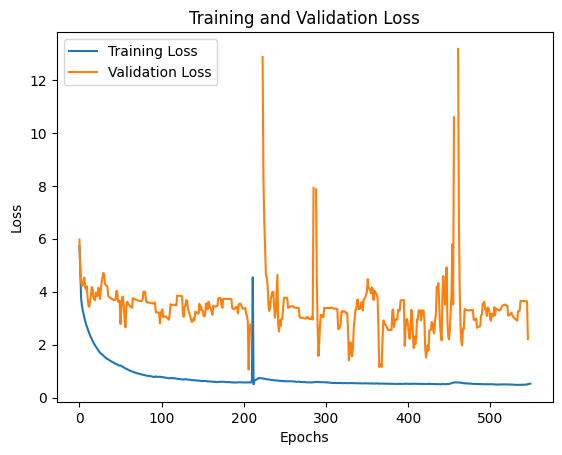

In [15]:
import matplotlib.pyplot as plt

# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')

# Check if validation loss is available and plot it
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [16]:
encoder_model.save('/media/ahaanbanerjee/Crucial X9/Capstone/Models/SparseAE_comp_wea_mar14.h5')